# 3.3. Redukcja wymiarowości danych

Nie istnieje jeden uniwersalny format zapisu dla każdego typu danych. Jakakolwiek informacja zawierająca w sobie jednostkę, może zapewne zostać skonwertowana do innych jednostek. Co więcej, jeśli mamy wiele cech, to niekoniecznie zmiana formatu zapisu musi przebiegać w relacji 1:1. 

## Współrzędne biegunowe

Dość naturalną formą reprezentacji danych w dwóch wymiarach są współrzędne kartezjańskie $ (x, y) $. Nie jest to jednak jedyna forma zapisu liczb w dwóch wymiarach, jaką możemy sobie wyobrazić.

In [1]:
import pandas as pd

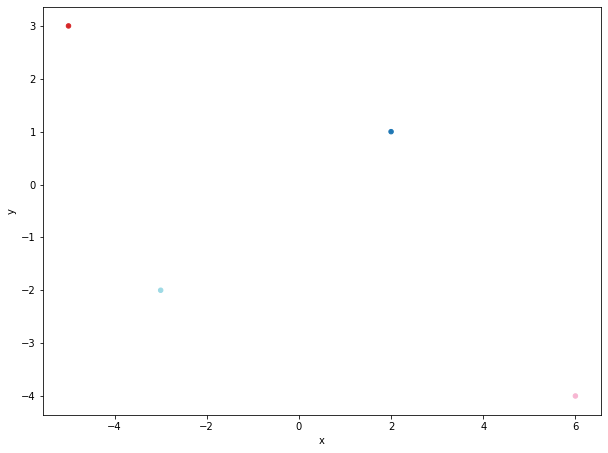

In [2]:
xy_df = pd.DataFrame({
    "x": [2, -5, 6, -3],
    "y": [1, 3, -4, -2]
})

ax = xy_df.plot.scatter(x="x", y="y", c=range(4), 
                        colorbar=False, cmap="tab20", 
                        figsize=(10.0, 7.5))
ax

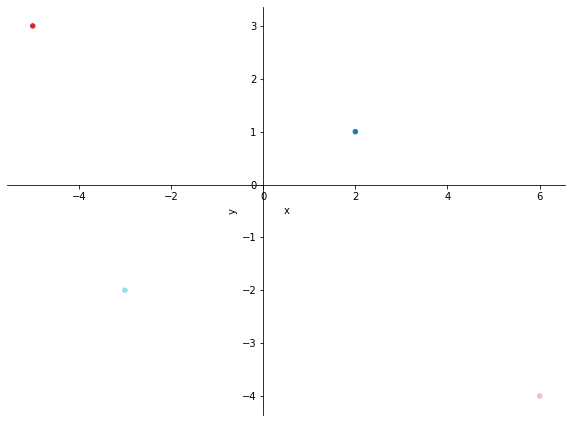

In [3]:
ax = xy_df.plot.scatter(x="x", y="y", c=range(4), 
                        colorbar=False, cmap="tab20", 
                        figsize=(10.0, 7.5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")

Każdy z punktów możemy również zapisać jako odległość od punktu $ (0,0) $ oraz kąt pomiędzy osią $ OX $, a odcinkiem wskazującym tę odległość. Oba zapisy jednoznacznie wyznaczają ten sam punkt przestrzeni, jednak wartości liczbowe są zupełnie inne.

$$ r = \sqrt{ x^{2} + y^{2} } $$

$$ \varphi = arccos(\frac{x}{r}) \cdot sgn(y) $$

Konwersji odwrotnej dokonujemy za pomocą:

$$ x = r \cdot \cos \varphi $$

$$ y = r \cdot \sin \varphi $$

In [4]:
import numpy as np

In [5]:
xy_df["r"] = np.sqrt((xy_df["x"] ** 2) + (xy_df["y"] ** 2))
xy_df["phi"] = np.arccos(xy_df["x"] / xy_df["r"]) * np.sign(xy_df["y"])
xy_df

,x,y,r,phi
0,2,1,2.236068,0.463648
1,-5,3,5.830952,2.601173
2,6,-4,7.211103,-0.588003
3,-3,-2,3.605551,-2.553590


In [6]:
xy_df["r"] * np.cos(xy_df["phi"])

0    2.0
1   -5.0
2    6.0
3   -3.0
dtype: float64

In [7]:
xy_df["r"] * np.sin(xy_df["phi"])

0    1.0
1    3.0
2   -4.0
3   -2.0
dtype: float64

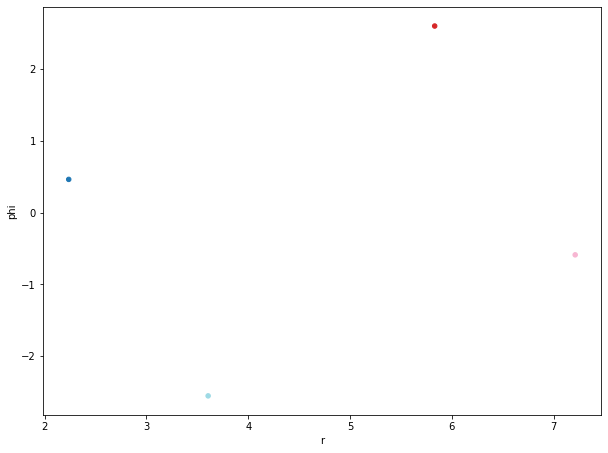

In [8]:
ax = xy_df.plot.scatter(x="r", y="phi", c=range(4), 
                        colorbar=False, cmap="tab20",
                        figsize=(10.0, 7.5))

## PCA - Principal Component Analysis

Istnieją metody, które są w stanie zakodować dany zbiór cech w innej przestrzeni niż oryginalna. Jednym z podstawowych algorytmów jest metoda PCA. Koduje ona informacje z wykorzystaniem kombinacji liniowych oryginalnych wymiarów w taki sposób, iż na pierwszym wymiarach kodowane jest jak najwięcej wariancji oryginalnych danych.

W scikit-learn metoda PCA jest dostępna jako już zaimplementowany moduł, z którego skorzystamy.

In [9]:
from sklearn.decomposition import PCA

In [10]:
iris_df = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
)
iris_df.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
127,6.1,3.0,4.9,1.8,virginica
9,4.9,3.1,1.5,0.1,setosa
12,4.8,3.0,1.4,0.1,setosa
35,5.0,3.2,1.2,0.2,setosa


In [11]:
pca = PCA(n_components=2)
iris_2d = pca.fit_transform(
    iris_df.drop(columns="species")
)
iris_2d_df = pd.DataFrame(iris_2d, 
                          columns=["pca_0", "pca_1"])
iris_2d_df.sample(n=5)

,pca_0,pca_1
50,1.284826,0.685160
124,2.275431,0.334991
32,-2.648862,0.813364
86,1.220691,0.407620
25,-2.506669,-0.146017


In [12]:
colors, mapping = pd.factorize(iris_df["species"])
colors, mapping

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

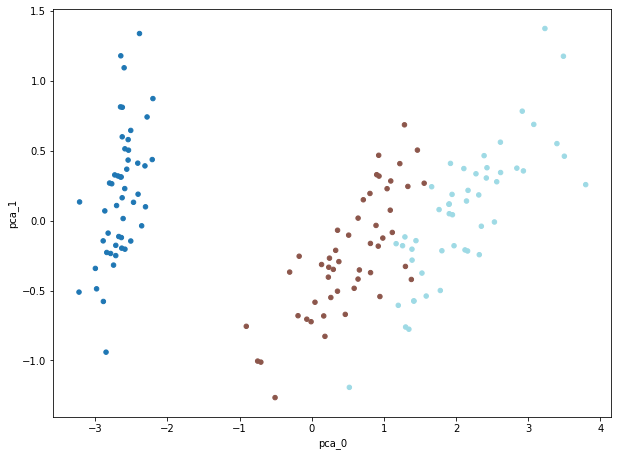

In [13]:
iris_2d_df.plot.scatter(x="pca_0", y="pca_1", 
                        c=colors, cmap="tab20", colorbar=False,
                        figsize=(10.0, 7.5))

PCA może być traktowane jako forma zmniejszania wymiarowości danych, którą możemy trenować na naszym zbiorze. Tak stworzony, może być wykorzystany do tranformacji nowych punktów w tę samą, nauczoną przestrzeń. **Co ważne, PCA nie jest bezstratną metodą kompresji i zazwyczaj tracimy informacje po przejściu do niżejwymiarowej przestrzeni!**

## t-SNE - t-distributed Stochastic Neighbor Embedding

Metoda t-SNE jest stworzona głównie na potrzeby wizualizacji danych wielowymiarowych. W odróżnieniu od PCA, możemy jedynie zwizualizować dany zbiór, jednak otrzymując nowe punkty, nie jesteśmy w stanie w łatwy sposób dokonać ich transformacji do nowej przestrzeni. PCA jest metodą dużo wydajniejszą i zaleca się najpierw skorzystać z PCA, aby ograniczyć wymiarowość danych do co najwyżej 50 cech, a dopiero później wykorzystać t-SNE.

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2)
iris_2d_tsne = tsne.fit_transform(
    iris_df.drop(columns="species")
)
iris_2d_tsne_df = pd.DataFrame(iris_2d_tsne, 
                          columns=["tsne_0", "tsne_1"])
iris_2d_tsne_df.sample(n=5)

,tsne_0,tsne_1
133,-7.358649,7.859347
89,-9.169380,14.545543
110,-7.628790,5.369832
117,-6.535101,0.799670
73,-8.522057,10.670490


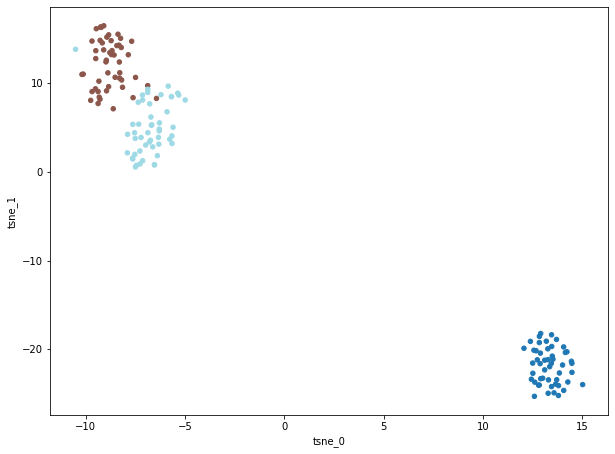

In [16]:
iris_2d_tsne_df.plot.scatter(x="tsne_0", y="tsne_1", 
                             c=colors, cmap="tab20", colorbar=False,
                             figsize=(10.0, 7.5))